In [ ]:
# STEP 1: EKSTRAK ZIP
import zipfile, os

zip_path = '/content/bugenvil data.zip'  # pastikan nama file ZIP cocok dengan file upload di Colab
extract_path = '/content/bugenvil_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# STEP 2: CEK FOLDER
image_dir = '/content/bugenvil_data/bugenvil data'

In [ ]:
# STEP 3: IMPORT DAN FUNGSI
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
def extract_glcm_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (512, 512))
    glcm = graycomatrix(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    energy = graycoprops(glcm, 'energy').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()
    return contrast, correlation, energy, homogeneity

In [ ]:
# STEP 4: EKSTRAK FITUR
data = []
labels = []
label_map = {
    'galabra': 'glabra', 'glabra': 'glabra',
    'speciosa': 'speciosa',
    'spectabilis': 'spectabilis',
    'variegata': 'variegata'
}

for filename in tqdm(os.listdir(image_dir)):
    file_path = os.path.join(image_dir, filename)
    if os.path.isfile(file_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            features = extract_glcm_features(file_path)
            basename = os.path.splitext(filename)[0]
            parts = basename.lower().split()
            if len(parts) >= 2:
                label_word = parts[1].replace("e", "")  # menangani 'bugenvile' → 'bugenvil'
                label = label_map.get(label_word, label_word)
                data.append(features)
                labels.append(label)
        except Exception as e:
            print(f"Gagal proses {file_path} karena {e}")

100%|██████████| 12/12 [00:00<00:00, 17.01it/s]


In [ ]:
# STEP 5: BUAT DATAFRAME & SCALING
df = pd.DataFrame(data, columns=['contrast', 'correlation', 'energy', 'homogeneity'])
df['label'] = labels

X = df[['contrast', 'correlation', 'energy', 'homogeneity']]
y = df['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# 🤖 TRAINING KNN DAN EVALUASI
for k in [1, 3, 5, 7, 9]:
    print(f'\n🔍 K = {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f'Akurasi: {acc * 100:.2f}%')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


🔍 K = 1
Akurasi: 66.67%
Classification Report:
              precision    recall  f1-score   support

      glabra       0.00      0.00      0.00         0
     spciosa       1.00      0.50      0.67         2
  spctabilis       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.67      0.50      0.56         3
weighted avg       1.00      0.67      0.78         3

Confusion Matrix:
[[0 0 0]
 [1 1 0]
 [0 0 1]]

🔍 K = 3
Akurasi: 33.33%
Classification Report:
              precision    recall  f1-score   support

      glabra       0.00      0.00      0.00         0
     spciosa       0.00      0.00      0.00         2
  spctabilis       1.00      1.00      1.00         1
    varigata       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

Confusion Matrix:
[[0 0 0 0]
 [1 0 0 1]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

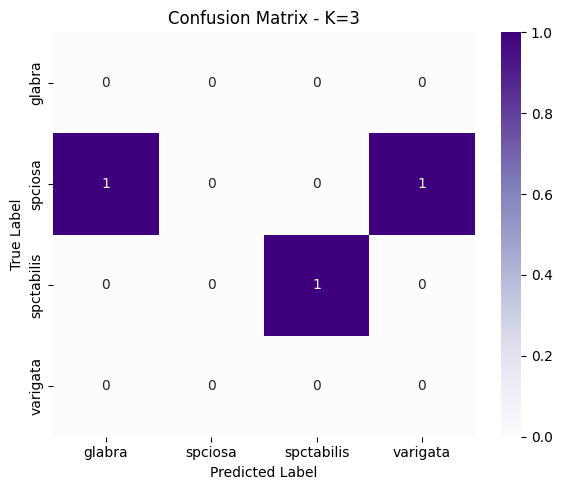

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Training ulang satu model (misalnya K=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=model.classes_, yticklabels=model.classes_)

plt.title('Confusion Matrix - K=3')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()